## Plotting!

- Just some simple functions providing basic plotting functionality (with and without labels) --> helpful for both inference analysis but also for EDA

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import os

In [ ]:
lbl_csvs = [x for x in os.listdir('.') if x[-3:] == 'csv']
lbl_csvs

['blip2-flan-t5-xl-coco.csv', 'blip2-flan-t5-xl.csv', 'blip2-opt-2.7b.csv']

In [ ]:
model_names = [x[:-4] for x in lbl_csvs]
model_names

['blip2-flan-t5-xl-coco', 'blip2-flan-t5-xl', 'blip2-opt-2.7b']

In [ ]:
class model_results():
    def __init__(self):
        self.lbl_csvs = [x for x in os.listdir('.') if x[-3:] == 'csv']
        self.model_names = [x[:-4] for x in self.lbl_csvs]
        self.df_dict = {self.model_names[x]: pd.read_csv(self.lbl_csvs[x]) for x in range(len(self.model_names))}
        self.df_cols = ['img_path'] + list(self.df_dict.keys())
        self.df = pd.DataFrame(zip(self.df_dict[self.model_names[0]]['img_path'].values,
                                   self.df_dict[self.model_names[0]]['label'].values, 
                                   self.df_dict[self.model_names[1]]['label'].values,
                                   self.df_dict[self.model_names[2]]['label'].values,), columns=self.df_cols)

In [ ]:
results = model_results()
results.lbl_csvs, results.model_names

(['blip2-flan-t5-xl-coco.csv', 'blip2-flan-t5-xl.csv', 'blip2-opt-2.7b.csv'],
 ['blip2-flan-t5-xl-coco', 'blip2-flan-t5-xl', 'blip2-opt-2.7b'])

In [ ]:
one_row = results.df.iloc[1]
one_row

img_path                             data/campaign2/0021/image_0021801.png
blip2-flan-t5-xl-coco    a green barrel sitting on the ground in a dirt...
blip2-flan-t5-xl         a green pipe is sitting on the ground in a dir...
blip2-opt-2.7b           a green pipe sitting in the dirt next to a bri...
Name: 1, dtype: object

In [ ]:
one_row.index[1]

'blip2-flan-t5-xl-coco'

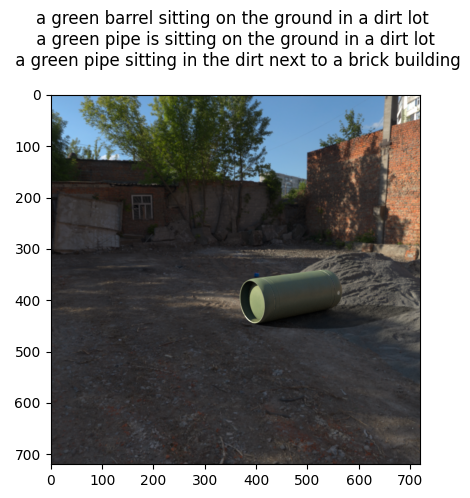

In [ ]:
plt.imshow(Image.open(one_row['img_path']))
plt.title(f'{one_row[one_row.index[1]]} \n {one_row[one_row.index[2]]} \n {one_row[one_row.index[3]]}');

In [ ]:
def plot_one(img, lbl, ax=None, figsize=None):
    if ax is None: _, ax = plt.subplots(figsize=figsize)
    ax.imshow(img)
    ax.set_title(lbl, fontdict={'fontsize':8}, pad=0)
    ax.axis('off')

In [ ]:
def get_img(row): return Image.open(row['img_path'])

def get_lbl(row): return f'{row[row.index[1]]} \n {row[row.index[2]]} \n {row[row.index[3]]}'

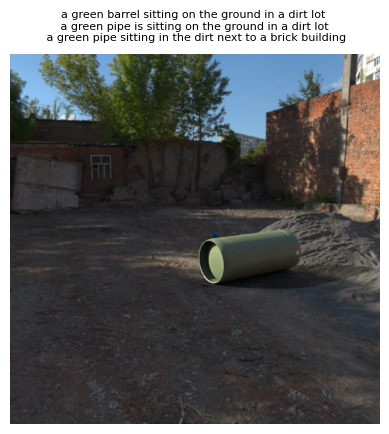

In [ ]:
plot_one(get_img(one_row), get_lbl(one_row))

Ok so we can plot a single image and all 3 associated labels. Lets work on plotting multiple images/labels at the same time

In [ ]:
#this will get us our subplot dimensions
def subplot_shape(samples, n_cols=4, n_rows=None):
    if n_rows is None and n_cols is None: n_cols = 4
    if n_rows is None: n_rows = max(1, (len(samples) // n_cols))
    if n_cols is None: n_cols = len(samples) // n_rows
    return n_rows, n_cols


def plot_subplots(n_cols, n_rows, sample_idxs=None, figsize=None):
    #samples = [one_row, one_row, one_row]
    if sample_idxs is None: sample_idxs = np.arange(0, n_cols*n_rows)
    samples = results.df.iloc[sample_idxs].reset_index(drop=True)
    n_rows, n_cols = subplot_shape(samples, n_cols, n_rows)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    for s_idx,ax in zip(np.arange(len(samples)), axes.flat):
        one_row = samples.iloc[s_idx]
        plot_one(get_img(one_row), get_lbl(one_row), ax=ax)
    if len(axes.flat) > len(samples): #messy code to handle extra plots
        num_plot_remove = len(axes.flat) - len(samples)
        for idx in np.arange(num_plot_remove): fig.delaxes(axes.flat[len(axes.flat)-idx - 1])

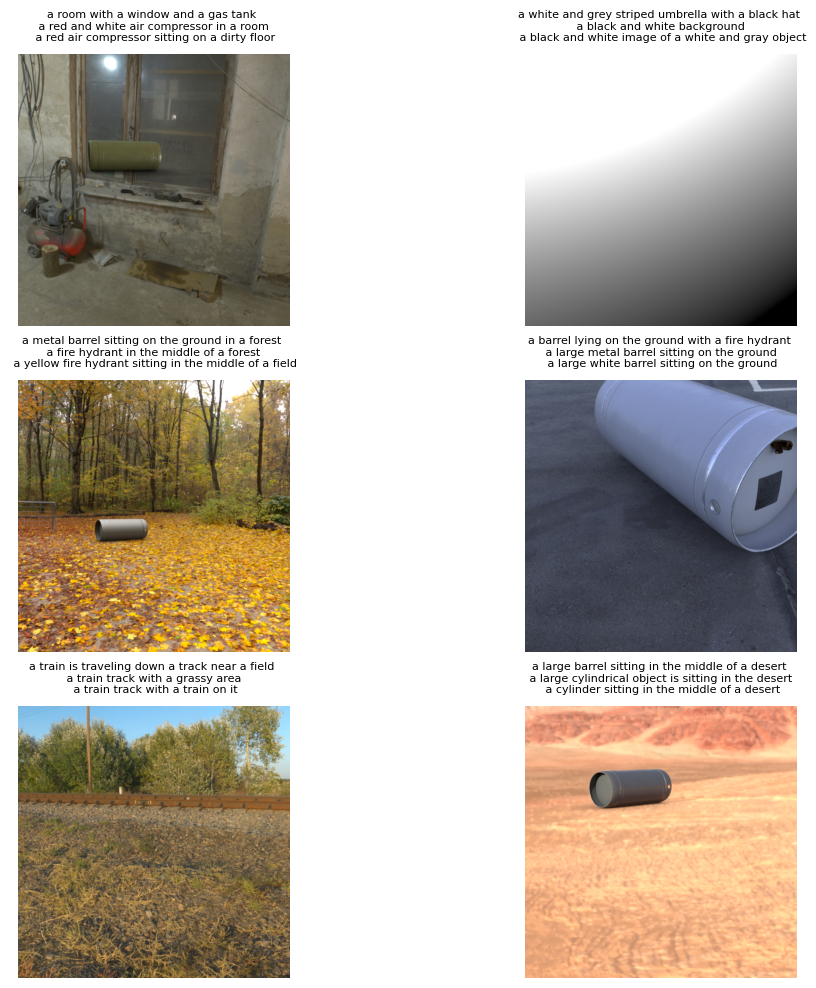

In [ ]:
plot_subplots(2, 3, sample_idxs=np.arange(6,12), figsize=(12,12))

Looks like normally one of the three models ends up predicting a decent label, but its not consistent which one it is!